In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import symbols, Eq, latex

Crear dos histogramas de frecuencias absolutas de dos maneras posibles

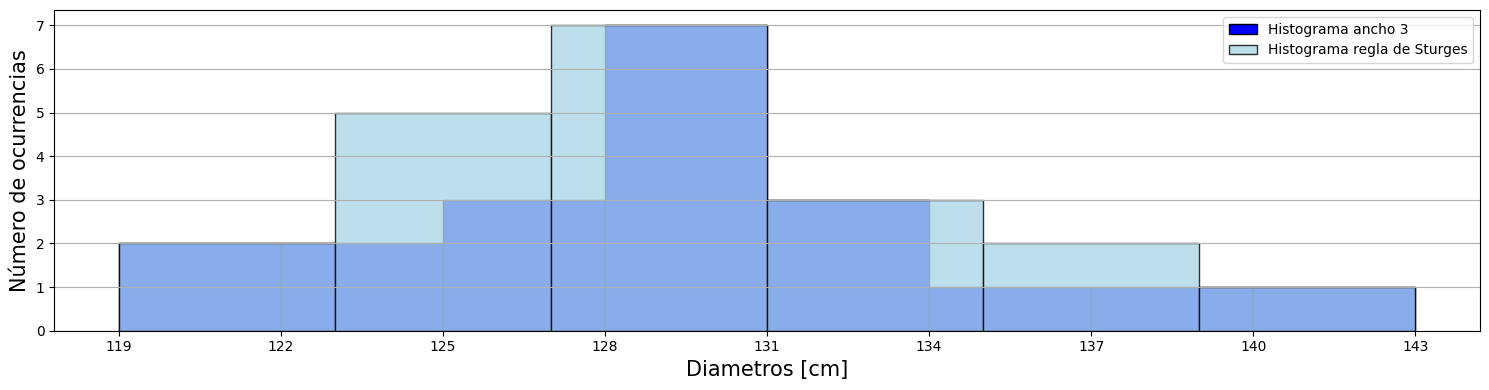

In [ ]:
D=np.array([128, 126, 131, 128, 130, 123, 132, 130, 128, 135, 123, 120, 126, 129, 138, 119, 125, 133, 143,130])
min_value = np.min(D)
max_value = np.max(D)
bin_edges = np.arange(min_value, max_value + 3, 3)

plt.hist(D, bins=bin_edges, label='Histograma ancho 3', color='Blue', edgecolor='black')

plt.hist(D, bins='sturges', label='Histograma regla de Sturges', color='Lightblue', edgecolor='black', alpha=0.8)

plt.legend()
plt.grid(axis='y')
plt.xlabel('Diametros [cm]', fontsize=15)
plt.ylabel('N√∫mero de ocurrencias', fontsize=15)

_ = plt.xticks(bin_edges)

plt.tight_layout()
plt.show()

Histogramas de frecuencias relativas

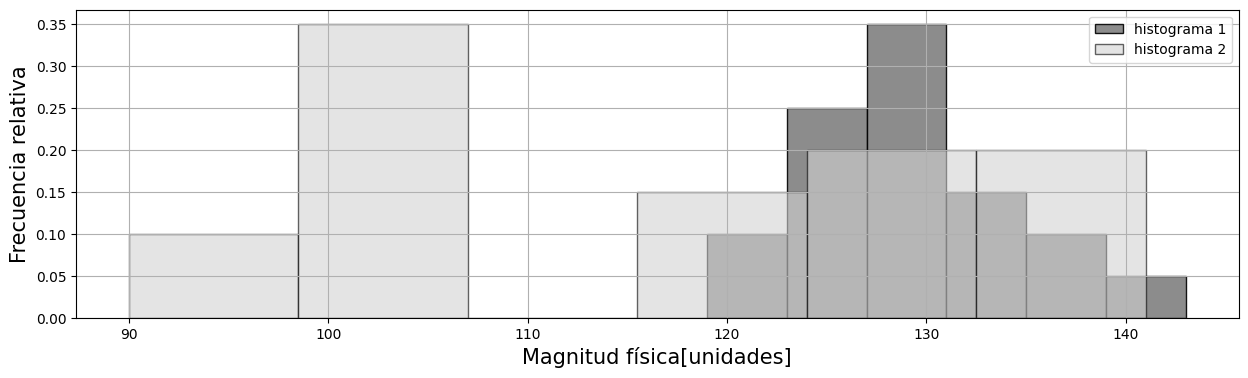

In [ ]:
D2=np.array([100, 126, 100, 128, 90, 102, 132, 141, 128, 135, 123, 120, 101, 104, 138, 119, 101, 133, 100,90])
cant_datos = len(D) #OJO! ACA COINCIDEN, PUEDE QUE NO SEA ASI SIEMPRE!!!!!
alturas,bins=np.histogram(D,bins='sturges')
alturas2, bins2 = np.histogram(D2, bins='sturges')
# divido la altura de cada barra por la cantidad de datos para obtener frecuencias
frecuencias=alturas/cant_datos
frecuencias2 = alturas2 / cant_datos
ancho_de_bin = bins[1] - bins[0]
ancho_de_bin2 = bins2[1] - bins2[0]
plt.bar(bins[:-1], frecuencias, align='edge', width=ancho_de_bin, alpha=0.9, label='histograma 1', color='gray', edgecolor='black' )
plt.bar(bins2[:-1], frecuencias2, align='edge', width=ancho_de_bin2, alpha=0.6, label='histograma 2', color='lightgray', edgecolor='black' )
plt.legend()
plt.grid(True)
plt.xlabel('Magnitud f√≠sica[unidades]', fontsize=15) #NO OLVIDAR CAMBIAR
plt.ylabel('Frecuencia relativa', fontsize=15)
plt.show()

Modelo lineal por cuadrados m√≠nimos ordinarios con par√°metro de bondad

In [ ]:
ancho_de_bin

4.0

Con o.o.

 a = (1.200 ¬± 0.529) y (0.20 ¬± 0.99) cm 


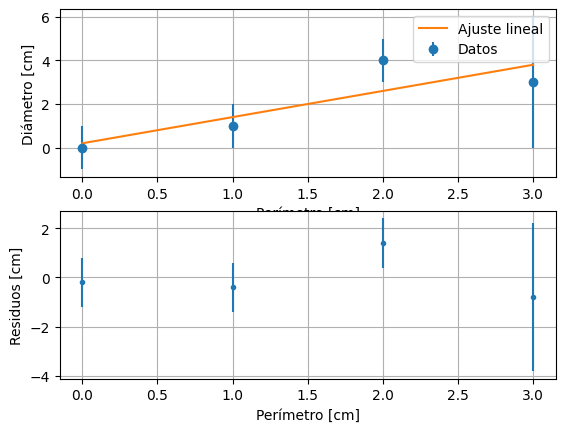

In [ ]:
variable_x=np.array([0,1,2,3])
variable_y=np.array([0,1,4,3]) #Ejemplo de juguete, cambiar!
Dy=np.array([1,1,1,3])
Dx=np.array([1,2,.5,.5])
def lineal(x,a,b):  #defino la funci√≥n lineal con pendiente a y ordenada al origen b
  y = a*x + b
  return y

#AJUSTE SIN PONDERAR
popt,pcov = curve_fit(lineal,variable_x,variable_y)     #en esta linea estoy haciendo el ajuste
a, b = popt      #par√°metro √≥ptimo
Da, Db = np.sqrt(np.diag(pcov)) #incerteza absoluta de la pendiente y de la ordenada al origen

#AJUSTE PONDERADO (COMENTAR O DESCOMENTAR DE SER NECESARIO)
#pars, cov = np.polyfit(variable_x, variable_y, deg=1, w=1/Dy, cov=True)
#a_polyfit, b_polyfit = pars
#Da_polyfit, Db_polyfit = np.sqrt(np.diag(cov))

y= lineal(variable_x,a,b)   #funci√≥n lineal evaluada en los par√°metros √≥ptimos

#Graficamos nuevamente los puntos con las bandas de error, pero ahora d en el el eje Y y p en el eje X:

ax1 = plt.subplot(2,1,1)  # Esto es para que haga dos gr√°ficos con 1 columna y 2 filas, y que el del ajuste sea el 1ero de las 2 filas

plt.errorbar(variable_x,variable_y,yerr=Dy, fmt='o',label='Datos')
plt.plot(variable_x,y,label='Ajuste lineal')
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Di√°metro [cm]')
plt.legend()
plt.grid()


# Gr√°fico de residuos
plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(variable_x, variable_y - y, yerr=Dy, fmt='.') #Dy el error en y!
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Residuos [cm]')
plt.grid()

#Escribamos los resultados del ajuste:
print(f' a = ({a:.3f} ¬± {Da:.3f}) y ({b:.2f} ¬± {Db:.2f}) cm ') #EN CASO DE SER PONDERADO ES A Y B POLYFIT O DA Y DB POLYFIT

Sin o.o.

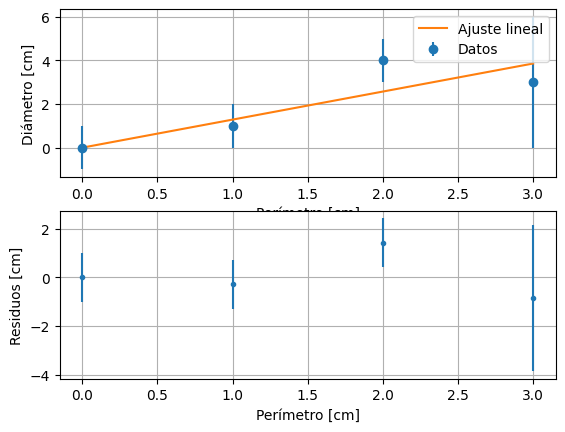

In [ ]:
# CASO 2: Aplico un modelo lineal del M√©todo de Cuadrados m√≠nimos y = ax (sin ordenada al orign)

def lineal(x,a):  #defino la funci√≥n lineal con pendiente a y SIN ordenada al origen
  y = a*x
  return y

#MODELO LINEAL SIN PONDERAR
popt,pcov = curve_fit(lineal,variable_x,variable_y)     #en esta linea estoy haciendo el ajuste
a = popt      #par√°metro √≥ptimo
Da = np.sqrt(np.diag(pcov)) #error de la pendiente

#MODELO LINEAL PONDERADO (COMENTAR O DESCOMENTAR DE SER NECESARIO)
#pars, cov = np.polyfit(variable_x, variable_y, deg=1, w=1/Dy, cov=True)
#a_polyfit = pars
#Da_polyfit = np.sqrt(np.diag(cov))

y= lineal(variable_x,a)   #funci√≥n lineal evaluada en el par√°metro √≥ptimo

#Graficamos nuevamente los puntos con las bandas de error, pero ahora d en el el eje Y y p en el eje X:

ax1 = plt.subplot(2,1,1)  # Esto es para que haga dos gr√°ficos con 1 columna y 2 filas, y que el del ajuste sea el 1ero de las 2 filas

plt.errorbar(variable_x,variable_y,yerr=Dy, fmt='o',label='Datos')
plt.plot(variable_x,y,label='Ajuste lineal')
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Di√°metro [cm]')
plt.legend()
plt.grid()

# Gr√°fico de residuos
plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(variable_x, variable_y - y, yerr=Dy, fmt='.')
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Residuos [cm]')
plt.grid()

In [ ]:
# definimos y como el d√≠ametro, para mantener estos nombres gen√©ricos que tenemos ac√°
X = variable_x
Y = variable_y
y_aj = y  #Tomar√° el √∫ltimo modelo si lo nombran de la misma manera
ey = Dx # error de la variable independiente!!! IMPORTANTISIMO

# residuos
res_sq = (variable_y - y_aj) ** 2

# variabilidad intr√≠nseca
ss_tot = np.sum((Y - np.mean(y)) ** 2)

# R¬≤
r2 = 1 - (np.sum(res_sq) / ss_tot)

# œá¬≤
ss = res_sq/ey**2
ch2 = np.sum(ss)/(len(Y)-2) #Este c√≥digo es el mismo en caso de ajustar en NO LINEAL, PERO VA len(Y)-cantidad de variables del modelo

# pearson
from scipy.stats import pearsonr
rp = pearsonr(X, Y)[0]

print(f'R¬≤ = {r2}')
print(f'œá¬≤ = {ch2}')
print(f'r_p = {rp}')

R¬≤ = 0.7148676171079278
œá¬≤ = 5.561224489795251
r_p = 0.8485281374238571


Ejemplo c√≥digo ca√≠da libre

In [ ]:

t_libre = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
x_libre = np.array([20, 15, 10, 5, 1, 0.1, -20, -40, -60, -75, -110, -130, -180, -210, -230, -300, -320, -380, -410, -450, -510])
t_libre2 = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
x_libre2 = np.array([18, 14, 10, 4, 1, 0.1, -20, -40, -62, -71, -111, -130, -189, -220, -230, -300, -320, -380, -410, -450, -510])

Dt_libre = 0.01   # s
Dx_libre = 20     #m
Dt_libre2 = .01
Dx_libre2 = 20
#Grafiquemos
plt.figure(figsize=(6, 4))
plt.errorbar(t_libre2, x_libre2, xerr=Dt_libre2, yerr=Dx_libre2, fmt='o')
plt.errorbar(t_libre, x_libre, xerr=Dt_libre, yerr=Dx_libre, fmt='o') #Util para observar si hay repetibilidad

plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x (m)')

Text(0, 0.5, 'x (m)')

LIBEAS UTILES PARA COMPARACION DE ERRORES ABSOLUTOS

In [ ]:
Ert_libre = np.abs(Dt_libre/t_libre)  # Por definici√≥n es el m√≥dulo
Erx_libre = np.abs(Dx_libre/x_libre)

print('Cantidad de mediciones en las que Ert > Erx:', sum(Ert_libre > Erx_libre))
print('Cantidad de mediciones en las que Ert < Erx:', sum(Ert_libre < Erx_libre))

#Si colocan print(Ert,Erx) tambi√©n podr√≠an ver los resultados de los errores relativos de ambas variables

Cantidad de mediciones en las que Ert > Erx: 0
Cantidad de mediciones en las que Ert < Erx: 21


### Aplicamos un modelo no lineal del m√©todo de cuadrados m√≠nimos

¬°Ahora vamos a aplicar el modelo! Para esto, usamos la funci√≥n `curve_fit` que importamos hace un rato. Si miramos la [documentaci√≥n](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) vemos que esta funci√≥n, entre otras cosas, acepta los siguientes par√°metros:
* `f`: funci√≥n del modelo
* `x`: los valores en el eje horizontal de mis datos
* `y`: los valores en el eje vertical
* `p0`: los valores iniciales de los par√°metros que yo estimo. La funci√≥n `curve_fit` va a agarrar estos valores y "mejorarlos" para que la curva se parezca a mis datos. M√°s adelante formalizaremos esto.

¬øY qu√© me devuelve la aplicaci√≥n del modelo? De nuevo, miremos la documentaci√≥n:
* `popt`: los par√°metros _optimizados_, el valor de los par√°metros de la funci√≥n que mejor ajusta a los datos
* `pcov`: la _martiz de covarianzas_ de mis par√°metros. Este concepto se escapa un poco a la materia, pero la documentaci√≥n nos dice todo lo que necesitamos saber: la ra√≠z cuadrada de los elementos de la diagonal de la matriz de covarianza (`np.sqrt(np.diag(pcov))`) representa la incerteza de los par√°metros ajustados.

¬øEn este caso qu√© son los par√°metros? Eso va a depender de con qu√© funci√≥n yo quiera aplicar a mis datos. En este caso, voy a usar una par√°bola.
 Voy a emplear tiempo inicial `t_0` igual a cero. Para los valores iniciales de los par√°metros voy a usar una estimaci√≥n burda de lo que creo que deber√≠an dar. En este caso, pruebo como condici√≥n inicial 10 m/s2 para la aceleraci√≥n de la gravedad, 35 cm para la posici√≥n inicial y cero para la velocidad inicial (la idea es colocar las condiciones iniciales aprox. de acuerdo con los datos de su experimento). ¬øCreen que resultar√° nula `v_0`?

Un detalle s√∫per importante es que la funci√≥n `curve_fit` espera que la funci√≥n que utilicemos para modelar tome como primer valor los datos del eje horizontal (tiempos en este caso), y despu√©s, uno a uno, los par√°metros:

```python
def funci√≥n_a_ajustar(variable_independiente, par√°metro1, par√°metro2, ...):
  ...
```

array([19.7516318 ,  1.5714933 , 11.02102609])

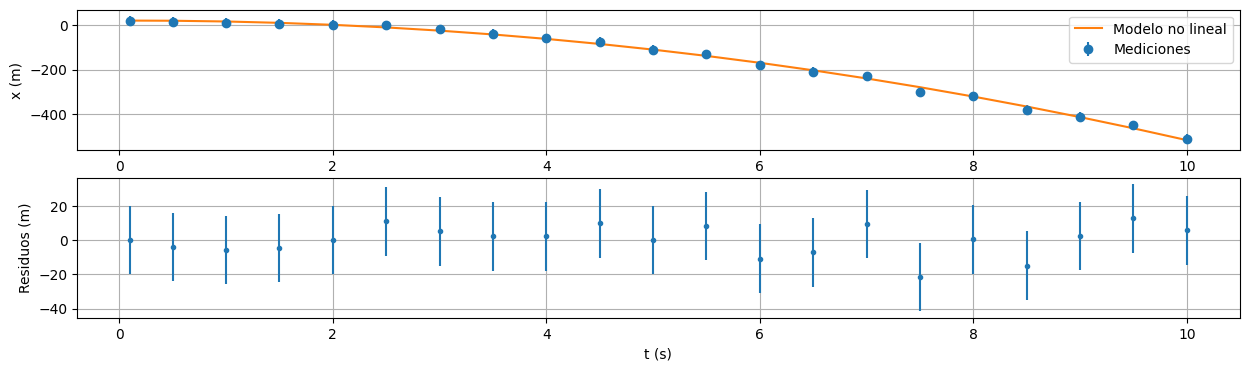

In [ ]:
#CHEQUEAR SUSTITUIR DONDE DICE t_libre o x_libre y Dt_libre Dx_libre
#p0 son las condiciones iniciales, n√≥tese que el tiempo es la variable independiente, por tanto
#no va en p0
def funcionNOlineal(t, x0, v0, g):  #defino la funci√≥n no lineal
  y = x0+(v0*t)-(g*0.5*t**2)
  return y

parametros_ajustados, p_cov = curve_fit(funcionNOlineal, t_libre, x_libre, p0=[35, 0, 10])   # p0 son las condiciones iniciales que le d√≠ a x0, v0 y g para que le sea m√°s f√°cil obtener el modelo

x0_aj, v0_aj, g_aj = parametros_ajustados
Dx0, Dv0, Dg = np.sqrt(np.diag(p_cov))

# grafico datos con el ajuste superpuesto

ax1 = plt.subplot(2,1,1)

plt.errorbar(t_libre, x_libre, yerr=Dx_libre, fmt='o', label='Mediciones')
plt.plot(t_libre, funcionNOlineal(t_libre, x0_aj, v0_aj, g_aj), label='Modelo no lineal')
plt.legend()
plt.grid()
#plt.xlabel('t (s)') quito la leyenda del eje x en la Fig. de los datos experimentales, para evitar que se tape a medias con el gr√°fico de residuos
plt.ylabel('x (m)')

# Gr√°fico de residuos
plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(t_libre, x_libre - funcionNOlineal(t_libre, x0_aj, v0_aj, g_aj), yerr=Dx_libre, fmt='.')
plt.xlabel('t (s)')
plt.ylabel('Residuos (m)')
plt.grid()
parametros_ajustados


In [ ]:
variable_y=x_libre

In [ ]:
X = t_libre
Y = x_libre
y_aj = funcionNOlineal(t_libre, x0_aj, v0_aj, g_aj) #Tomar√° el √∫ltimo modelo si lo nombran de la misma manera
ey = Dx_libre # error de la variable independiente!!! IMPORTANTISIMO

# residuos
res_sq = (variable_y - funcionNOlineal(t_libre, x0_aj, v0_aj, g_aj)) ** 2

# variabilidad intr√≠nseca
ss_tot = np.sum((Y - np.mean(y)) ** 2)

# R¬≤
r2 = 1 - (np.sum(res_sq) / ss_tot)

# œá¬≤
ss = res_sq/ey**2
ch2 = np.sum(ss)/(len(Y)-3) #Este c√≥digo es el mismo en caso de ajustar en NO LINEAL, PERO VA len(Y)-cantidad de variables del modelo

# pearson
from scipy.stats import pearsonr
rp = pearsonr(X, Y)[0]

print(f'R¬≤ = {r2}')
print(f'œá¬≤ = {ch2}')
print(f'r_p = {rp}') #BIEN!!!

R¬≤ = 0.9986691699553075
œá¬≤ = 0.2127420052023147
r_p = -0.9630865436546789


In [ ]:
print(f' El resultado de g fue: g = ({g_aj:.2f} ¬± {Dg:.2f}) m/s¬≤')
print(f' Xo = ({x0_aj:.1f} ¬± {Dx0:.1f}) m')
print(f' Vo = ({v0_aj:.1f} ¬± {Dv0:.1f}) m/s')
#LO UNICO QUE PODEMOS REPORTAR!

 El resultado de g fue: g = (11.02 ¬± 0.50) m/s¬≤
 Xo = (19.8 ¬± 5.6) m
 Vo = (1.6 ¬± 2.6) m/s


PROP ERRORES

In [ ]:
'''
Derrores=np.sqrt(((dWdx1*dx1)**2)+((dWdx2*dx2)**2)+((dWx3*dx3)**2)+)
'''

'\nDerrores=np.sqrt(((dWdx1*dx1)**2)+((dWdx2*dx2)**2)+((dWx3*dx3)**2)+)\n'

Dos modelos lineales , uno ponderado y otro sin ponderar

 a = (12.300 ¬± 5.369) y b = (-7.20 ¬± 10.05) cm 
 a (ponderado) = (3.002 ¬± 0.117) y b (ponderado) = (-1.00 ¬± 0.15) cm 


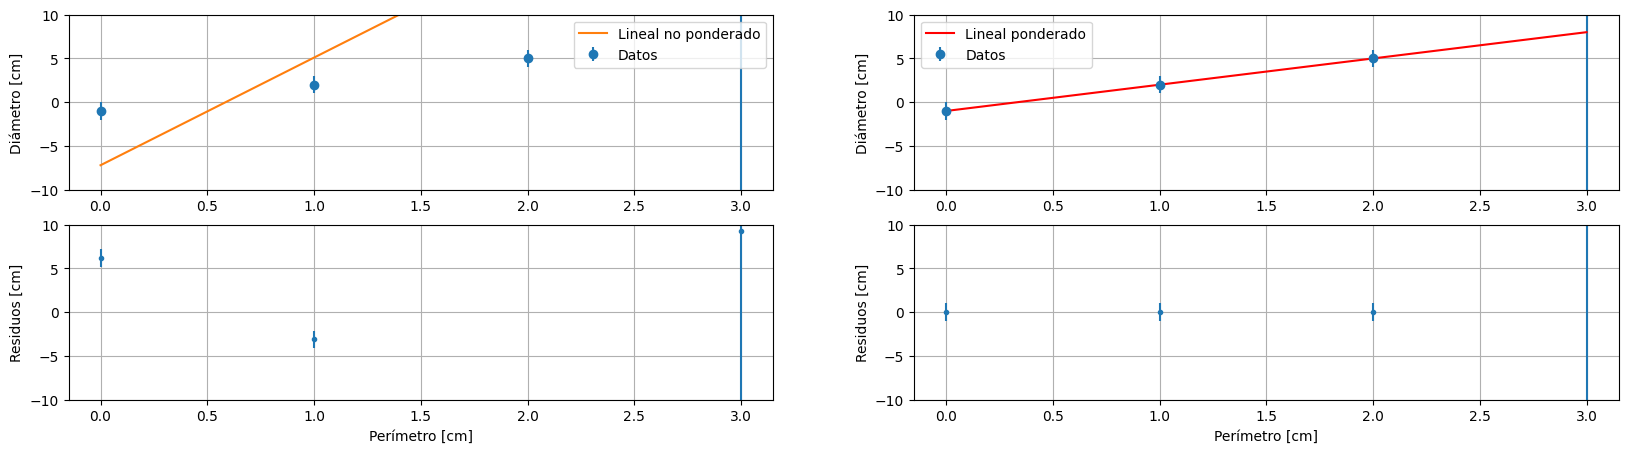

In [ ]:
variable_x=np.array([0,1,2,3])
variable_y=np.array([-1,2,5,39]) #Ejemplo de juguete, cambiar!
Dy=np.array([1,1,1,133])
Dx=np.array([1,2,.5,.5])
def lineal(x,a,b):  #defino la funci√≥n lineal con pendiente a y ordenada al origen b
  y = a*x + b
  return y

#AJUSTE SIN PONDERAR
popt,pcov = curve_fit(lineal,variable_x,variable_y)     #en esta linea estoy haciendo el ajuste
a, b = popt      #par√°metro √≥ptimo
Da, Db = np.sqrt(np.diag(pcov)) #incerteza absoluta de la pendiente y de la ordenada al origen
pars, cov = np.polyfit(variable_x, variable_y, deg=1, w=1/Dy, cov=True)
a_polyfit, b_polyfit = pars
Da_polyfit, Db_polyfit = np.sqrt(np.diag(cov))


y_nopond = lineal(variable_x,a,b)
y = lineal(variable_x,a_polyfit,b_polyfit)


#Graficamos nuevamente los puntos con las bandas de error, pero ahora d en el el eje Y y p en el eje X:
plt.figure(figsize=(20,5))
ax1 = plt.subplot(2,2,1)  # Esto es para que haga dos gr√°ficos con 1 columna y 2 filas, y que el del ajuste sea el 1ero de las 2 filas

plt.errorbar(variable_x,variable_y,yerr=Dy, fmt='o',label='Datos')
plt.plot(variable_x,y_nopond,label='Lineal no ponderado')
plt.ylabel('Di√°metro [cm]')
plt.legend()
plt.grid()
plt.ylim(-10,10) #esto sirve para comparar. Quitarlo para ver bien el modelo no ponderado


plt.subplot(2,2,3, sharex=ax1)
plt.errorbar(variable_x, variable_y - y_nopond, yerr=Dy, fmt='.') #Dy el error en y!
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Residuos [cm]')
plt.grid()
plt.ylim(-10,10) #esto sirve para comparar. Quitarlo para ver bien el modelo no ponderado


# Gr√°fico de residuos
plt.subplot(2,2,2, sharex=ax1)
plt.errorbar(variable_x,variable_y,yerr=Dy, fmt='o',label='Datos')
plt.plot(variable_x,y,label='Lineal ponderado',color='red')
plt.ylabel('Di√°metro [cm]')
plt.legend()
plt.grid()
plt.ylim(-10,10)

plt.subplot(2,2,4, sharex=ax1)
plt.errorbar(variable_x, variable_y - y, yerr=Dy, fmt='.') #Dy el error en y!
plt.xlabel('Per√≠metro [cm]')
plt.ylabel('Residuos [cm]')
plt.grid()
plt.ylim(-10,10)

#Escribamos los resultados del ajuste:
print(f' a = ({a:.3f} ¬± {Da:.3f}) y b = ({b:.2f} ¬± {Db:.2f}) cm ')
print(f' a (ponderado) = ({a_polyfit:.3f} ¬± {Da_polyfit:.3f}) y b (ponderado) = ({b_polyfit:.2f} ¬± {Db_polyfit:.2f}) cm ')

Propagaci√≥n de errores con latex ejemplo:


Sea: $M_{0}=3R_{0}a_{0}$ $\,\,\,\,\,\,\,\,$ $\Delta M = \sqrt{\left( \frac{\partial M}{\partial R} \Bigg|_{x = (a_{0},R_{0})} \Delta R \right)^2 + \left( \frac{\partial M}{\partial a} \Bigg|_{x = (a_{0},R_{0})} \Delta a \right)^2}$

Donde:
$\frac{\partial M}{\partial R} \Bigg|_{x = (a_{0},R_{0})} = 3a_{0}$ y $\frac{\partial M}{\partial a} \Bigg|_{x = (a_{0},R_{0})} = 3R_{0}$

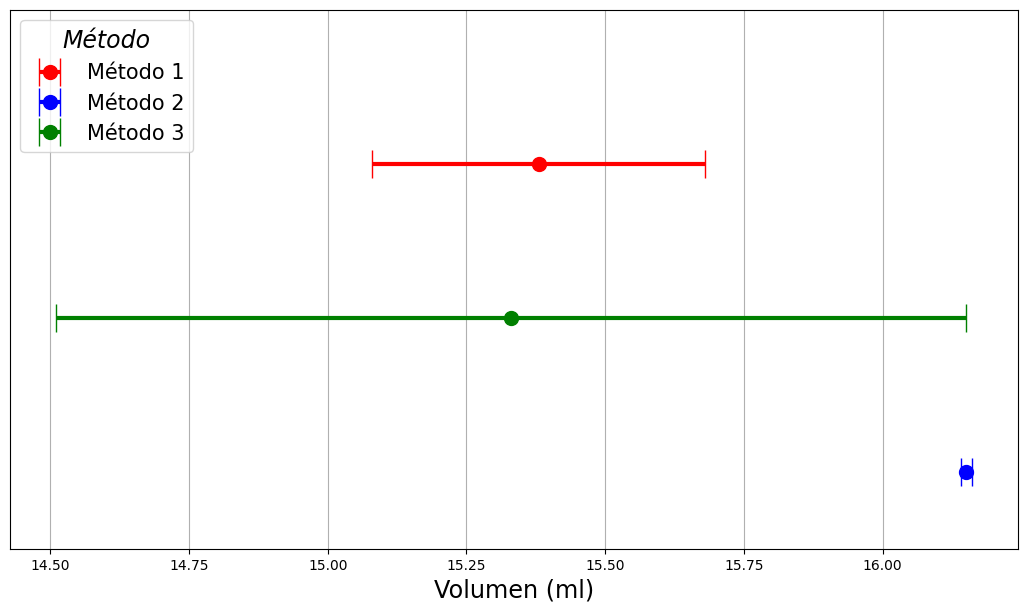

In [ ]:
#AHORA S√ç!!
#Comparemos los resultados de dos MF!! ¬øQu√© resultado fue m√°s preciso? Presentan diferencias significativas los resultados de T?
#Todo lo puedo discutir a partir del gr√°fico!

plt.figure(figsize=(13,7))  # Dice que haga una Figura de tama√±o  15(ancho)x7(largo), pueden variarlos si prefieren que sea m√°s grande o m√°s chica

#Geometrico
plt.errorbar(x=15.38, y=3, xerr=0.30, capsize=10,color='red', label = 'M√©todo 1', elinewidth=3, fmt = 'o', markersize = 10)  #Es la manera de hacer un gr√°fico de puntos con l√≠neas de error. x=PT1, y=1 es que pondr√° el valor del promedio de T1 como 1 punto en la altura de Y=1; xerr=DT1 es la barra de error en el eje x ; capsize=10 es el tama√±o del borde de la l√≠nea de error

#Densidad
plt.errorbar(x=16.1509, y=1, xerr=0.0095, capsize=10,color='blue', label = 'M√©todo 2' , elinewidth=3,  fmt = 'o', markersize = 10)

#Arquimedes
plt.errorbar(x=15.33, y=2, xerr=0.82, capsize=10,color='green', label = 'M√©todo 3', elinewidth=3,  fmt = 'o', markersize = 10)
plt.yticks([])

plt.ylim(0.5, 4)    # Rango del eje Y. Si tengo 3 datos, deber√≠a ir del 0 al 4
plt.grid(axis = 'x', which = 'major')

#plt.yticks([1, 2], ["T1", "T2"])    # nombres de las marcas del eje Y
#plt.ylabel("Integrantes", fontsize="large")   # Ac√° podr√≠an colocar M√©todos
plt.xlabel("Volumen (ml)", fontsize="xx-large")  # Ac√° ir√≠a el nombre de la MF medida

plt.legend(fontsize = 15, loc  = 'upper left', title = 'M√©todo', title_fontproperties = {'size': 17, 'style': 'oblique'})

In [ ]:
datos= [1,2,3,4,4,5,5,6,12,2,12,1,1,1,1,2,3,1,2,1,2,1,3,2]
_, bin_edges, _, = plt.hist(datos, bins='sturges', label='histograma', color='C02', edgecolor='black')
plt.legend()
plt.grid(axis='y')
plt.xlabel('alturas[cm]', fontsize=15)
plt.ylabel('N√∫mero de ocurrencias', fontsize=15)
_ = plt.xticks(bin_edges)
#un solo hist por sturges

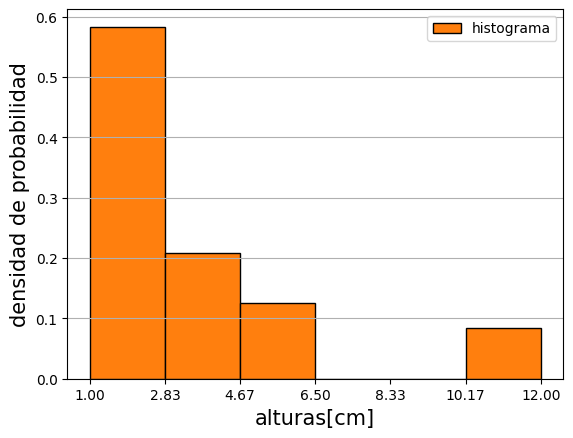

In [ ]:
#con frecuencias relativas
cant_datos = len(datos)
alturas, bins = np.histogram(datos, bins='sturges')
# divido la altura de cada barra por la cantidad de datos para obtener frecuencias
frecuencias = alturas / cant_datos

# ahora s√≠, hago el gr√°fico de barras cuid√°ndome de formatearlo correctamente
ancho_de_bin = bins[1] - bins[0]
plt.bar(bins[:-1], frecuencias, align='edge', width=ancho_de_bin, label='histograma', color='C01', edgecolor='black' )
plt.legend()
plt.grid(axis='y')
plt.xlabel('alturas[cm]', fontsize=15)
plt.ylabel('densidad de probabilidad', fontsize=15)
_ = plt.xticks(bins) # eso es para poner los valores en los bordes de los bins

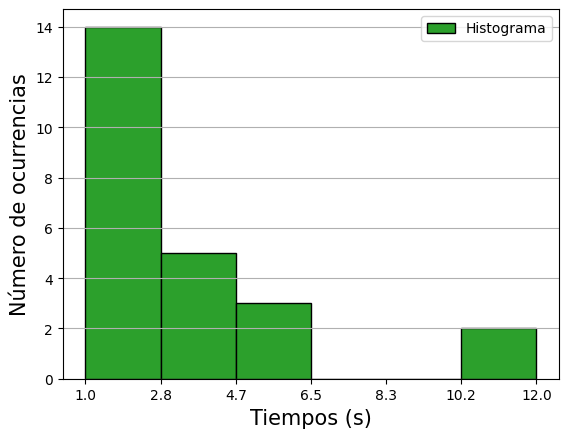

In [ ]:
_, bin_edges, _ = plt.hist(datos, bins='sturges', label='Histograma', color='C2', edgecolor='black')

# Etiquetas y configuraci√≥n de la gr√°fica
plt.legend()
plt.grid(axis='y')
plt.xlabel('Tiempos (s)', fontsize=15)
plt.ylabel('N√∫mero de ocurrencias', fontsize=15)

# Configurar los ticks del eje x
x_ticks = bin_edges
plt.xticks(x_ticks, labels=[f"{label:.1f}" for label in x_ticks]) #para acortar decimales

plt.show()


In [ ]:
#A) Con 3 medidas: Si ùë∑ ‚â§ ùüê% Suficiente hacer 3 medidas
#B) Con 3 medidas: Si ùüê% < ùë∑ ‚â§ ùüñ% Hacer 3 medidas m√°s, hasta tener 6 Dx = max(sigma_ap,(np.max(x)-np.min(x))/4)
#C) Con 6 medidas: Si ùüñ% < ùë∑ ‚â§ ùüèùüì% Seguir midiendo hasta tener 15 medidas
#D) Con 15 medidas: Si ùë∑ > ùüèùüì% Tomar un m√≠nimo de 50 medidas
#P=(R/np.mean(X))*100
#STURGES: ùê∂ = 1 + 3,3322 ùëôùëúùëî(ùëÅ)

OTRO EJEMPLO PARA CUALQUIER TIPO DE FUNCION, NOTAR QUE VA A TENER 5 PARAMETROS Y 5 INCERTEZAS ASOCIADAS A C/U (PARA TENER EN CUENTA EN EL CHI2)

In [ ]:
# para que las figus sean todas m√°s anchas:
plt.rcParams["figure.figsize"] = (15,4)
# funci√≥n con la que voy a ajustar la se√±al
def funcion(t, amp, f, phi, offset, lambd):
  return amp* np.exp(-lambd * t) * np.cos(f * 2 * np.pi * t + phi) + offset
indices = tiempo < 10
tiempo = tiempo[indices]
fuerza = fuerza[indices]
# ajusto
popt, pcov = curve_fit(funcion, tiempo, fuerza)
plt.figure(figsize=(6.4,15))

ax = plt.subplot(2,1,1)
# grafico
plt.errorbar(tiempo,fuerza,yerr=0.012134, xerr=1/100,fmt='o',label='Datos')
plt.plot(tiempo, funcion(tiempo, *popt), label='fit')
#p0= [,,,]
plt.grid()11.021026
plt.xlabel('Tiempo [s]')
plt.ylabel('Posici√≥n [m]')
print(popt)
print(np.sqrt(np.diag(pcov)))


plt.subplot(2, 1, 2, sharex=ax)
plt.errorbar(tiempo, fuerza - funcion(tiempo, *popt), yerr=0.012134, fmt='.')
plt.xlabel('y (m)')
plt.ylabel('Residuos (s)')
plt.grid()

NameError: name 'tiempo' is not defined